## Neural Networks Challenge:
* Create a multi-layer perceptron neural network model to predict on a labeled dataset of your choosing. 
* Compare this model to either a boosted tree or a random forest model.
* Describe the relative tradeoffs between complexity and accuracy.
* Be sure to vary the hyperparameters of your MLP!

I have chosen the [dataset](https://www.kaggle.com/blastchar/telco-customer-churn) that deals with the churns of Telco company. Churns are the customers who left the company last month. We will use Neural Network's supervised learning algorithms to predict the churns of Telco.

<img src="https://user-images.githubusercontent.com/55968160/77681831-2dd31b80-6f53-11ea-9697-8477db92a1e9.jpeg" width="300" height="200" />

Content

- Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

- The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup,   device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing,       monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
from itertools import cycle
plt.style.use('bmh')
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

import warnings
warnings.filterwarnings(
    action='ignore',
    module='scipy',
    message='internal gelsd'
)

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
List = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling','Churn']

for i, col in enumerate (List):
    df[col]= pd.get_dummies(df[col])
    df[col] = df[col].astype('int64')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,0,1,1,1,No phone service,DSL,No,...,No,No,No,No,Month-to-month,0,Electronic check,29.85,29.85,1
1,5575-GNVDE,Male,0,1,1,34,0,No,DSL,Yes,...,Yes,No,No,No,One year,1,Mailed check,56.95,1889.5,1
2,3668-QPYBK,Male,0,1,1,2,0,No,DSL,Yes,...,No,No,No,No,Month-to-month,0,Mailed check,53.85,108.15,0
3,7795-CFOCW,Male,0,1,1,45,1,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,1,Bank transfer (automatic),42.30,1840.75,1
4,9237-HQITU,Female,0,1,1,2,0,No,Fiber optic,No,...,No,No,No,No,Month-to-month,0,Electronic check,70.70,151.65,0


In [6]:
pd.options.mode.chained_assignment = None
# Converting Yes, No, No service to 1,0,0 respectively
df.MultipleLines[df.MultipleLines == 'Yes'] = 1
df.MultipleLines[df.MultipleLines == 'No phone service'] = 0
df.MultipleLines[df.MultipleLines == 'No'] = 0
df.MultipleLines = df.MultipleLines.astype('int64')

# Converting Yes, No, No service to 1,0,0 respectively
List = ['OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'OnlineBackup']

for i, col in enumerate (List):
    df[col][df[col] == 'Yes']= 1
    df[col][df[col] == 'No internet service']= 0
    df[col][df[col] == 'No']= 0
    df[col] = df[col].astype('int64')

# Converting Internet Service of DSL to 1, Fiber optic (being the fastest) to 2, No to 0.
df.InternetService[df.InternetService == 'DSL'] = 1
df.InternetService[df.InternetService == 'Fiber optic'] = 2
df.InternetService[df.InternetService == 'No'] = 0
df.InternetService = df.InternetService.astype('int64')

# Replacing dataframe's Contract (Month-to-month', 'One year', 'Two year') to 0,1,2

df.Contract[df.Contract == 'Month-to-month'] = 0
df.Contract[df.Contract == 'One year'] = 1
df.Contract[df.Contract == 'Two year'] = 2
df.Contract = df.Contract.astype('int64')

#Finally converting the Male to 1 and Female to 0.
# #Finally converting the Male to 1 and Female to 0.
df.gender[df.gender == 'Male'] = 1
df.gender[df.gender == 'Female'] = 0
df.gender = df.gender.astype('int64')

In [7]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df.PaymentMethod = LE.fit_transform(df.PaymentMethod)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(18), object(2)
memory u

In [9]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [10]:
#Let's drop the customer ID
df.drop(columns='customerID', inplace = True)

In [11]:
df.Churn.value_counts()

1    5174
0    1869
Name: Churn, dtype: int64

* **Here, for Churn,  "pd.get_dummies" is taking 1 as No and 0 as Yes.** 
* **And there is a class imbalance occuring for the number of yes. let's upsample it.**

In [12]:
from sklearn.utils import resample
# separate minority and majority classes
No_churn = df[df.Churn == 1]
Yes_churn = df[df.Churn == 0]

# upsample minority
churn_upsampled = resample(Yes_churn,replace=True, n_samples=len(No_churn),random_state=27)

# combine majority and upsampled minority
upsampled_df = pd.concat([No_churn,churn_upsampled])

In [13]:
upsampled_df.Churn.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

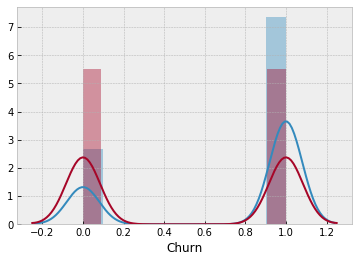

In [14]:
sns.distplot(df["Churn"])
sns.distplot(upsampled_df["Churn"])
plt.show()

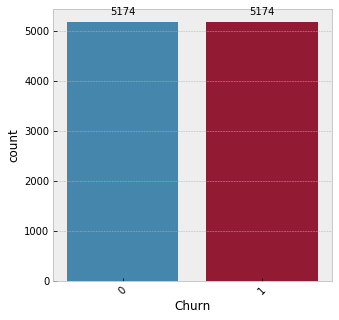

In [15]:
plt.figure(figsize = (5,5))
upsampled_df['Churn'].value_counts()

splot = sns.countplot(x="Churn",data=upsampled_df[['Churn']])
plt.xticks(rotation = 45)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., 
                    p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = upsampled_df.drop('Churn', 1)
Y = upsampled_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=150)

### Let's do 50 hidden layer size.

In [17]:
# Establish and fit the model, with a twenty-layer hidden layer.
# Import the model.
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), random_state=15)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=15, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [18]:
mlp.score(X_train, y_train)

0.7700038654812524

In [19]:
Y.value_counts()/len(Y)

1    0.5
0    0.5
Name: Churn, dtype: float64

In [20]:
cross_val_score(mlp, X_train, y_train, cv=5)

array([0.71410174, 0.59948487, 0.6443299 , 0.71005155, 0.69761444])

### Now lets try (10,20,10) hidden layers.

In [21]:
mlp1 = MLPClassifier(hidden_layer_sizes= (10,20,10), random_state=15)
mlp1.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 20, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=15, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [22]:
mlp1.score(X_train, y_train)

0.739337714212086

In [23]:
cross_val_score(mlp1, X_train, y_train, cv=5)

array([0.75853187, 0.76239536, 0.69974227, 0.72873711, 0.7453256 ])

In [24]:
mlp2 = MLPClassifier(hidden_layer_sizes=(6,9), random_state=15)
mlp2.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(6, 9), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=15, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [25]:
mlp2.score(X_train, y_train)

0.7616286561010179

In [26]:
cross_val_score(mlp2, X_train, y_train, cv=5)

array([0.72762395, 0.77205409, 0.7242268 , 0.73260309, 0.75628627])

### Now lets try 20 and choose the best model out of the 4 to fit the solver and alpha values for hyper tuning.

In [27]:
mlp3 = MLPClassifier(hidden_layer_sizes= (20,), random_state=15)
mlp3.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=15, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [28]:
mlp3.score(X_train, y_train)

0.7667826311042392

In [29]:
cross_val_score(mlp3, X_train, y_train, cv=5)

array([0.75273664, 0.69607212, 0.68492268, 0.7068299 , 0.70019342])

**Hidden layer size (6,9) has consistent 70% + score which can be chosen amongst the rest. 
Now we will apply solver and alpha to it.** 

In [30]:
mlp2 = MLPClassifier(hidden_layer_sizes=(6,9), alpha=0.02, random_state=15)
mlp2.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.02, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(6, 9), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=15, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [31]:
mlp2.score(X_train, y_train)

0.7368895760855559

In [32]:
cross_val_score(mlp2, X_train, y_train, cv=5)

array([0.72633612, 0.77591758, 0.72293814, 0.73002577, 0.75241779])

**We do notice a slight increase in the cross validation scores.**

Now let's compare the scores to Random Forest Model.

In [33]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = ensemble.RandomForestClassifier(n_estimators=25)
rfc.fit(X_train, y_train)
#Let's make predictions
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

0.8991109393119443

In [34]:
rfc_score = cross_val_score(rfc, X, Y, cv=5)
print('Cross-Validation Scores: {}'.format(rfc_score))
print('Averaged Cross-Validation Score: {:.2%}.'.format(rfc_score.mean()))

Cross-Validation Scores: [0.88695652 0.90483092 0.88937198 0.9        0.88974855]
Averaged Cross-Validation Score: 89.42%.


In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Classification report.
print(classification_report(y_test, y_pred))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1310
           1       0.95      0.84      0.89      1277

    accuracy                           0.90      2587
   macro avg       0.90      0.90      0.90      2587
weighted avg       0.90      0.90      0.90      2587

[[1252   58]
 [ 203 1074]]


In [36]:
rfc.score(X_train, y_train)

0.997809560623631

In [37]:
rfc.score(X_test, y_test)

0.8991109393119443

### SUMMARY
- The highest MLP score was 77% which was the result of choosing the hidden layer size as (6,9) after tuning.
- When comparing this score to the Random Forest, we could see that the MLP score is clearly of no match.
- The highest accuracy was found in Random Forest with train and test accuracies of 99% and 90% respectively.